# 02 Extract XYZ Coordinates

The elevation or depth of input data is needed to locate it in a 3D space. The data can either be provided when creating the data, i.e. when digitizing contour lines or by extracting it from a digital elevation model (DEM) or from an existing surface of an interface in the subsurface. For consistency, the elevation column will be denoted with ``Z``. The input vector data can be loaded again as ``GeoDataFrame`` using ``GeoPandas``. The raster from which elevation data will be extracted can either be provided as ``NumPy`` ``ndarray`` or opened with ``rasterio`` if a raster file is available on your hard disk.

<img src="../images/tutorial02_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/02_extract_xyz/'

In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="02_extract_xyz.zip", dirpath=file_path)

## Point Data

The point data stored as shape file will be loaded as GeoDataFrame. The raster will be loaded using rasterio. 

In [3]:
import rasterio
from rasterio.plot import show
import geopandas as gpd

gdf = gpd.read_file(file_path + 'interfaces_points.shp')

dem = rasterio.open(file_path + 'raster.tif')

The GeoDataFrame consists of ``id``, ``formation`` and ``geometry`` columns.

In [4]:
gdf.head()

,id,formation,geometry
0,None,Ton,POINT (19.15013 293.31349)
1,None,Ton,POINT (61.93437 381.45933)
2,None,Ton,POINT (109.35786 480.94557)
3,None,Ton,POINT (157.81230 615.99943)
4,None,Ton,POINT (191.31803 719.09398)


The differend bands of the raster data can be returned using the ``read(..)`` function. This will return the values of the raster at each cell location.

In [5]:
dem.read()

array([[[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
         622.05786],
        [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
         622.06714],
        [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
         622.08923],
        ...,
        [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
         366.3984 ],
        [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
         363.96167],
        [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
         361.78635]]], dtype=float32)

### Plotting the data

The figures below show the original raster and point data. They can be plotted using ``matplotlib`` functions.

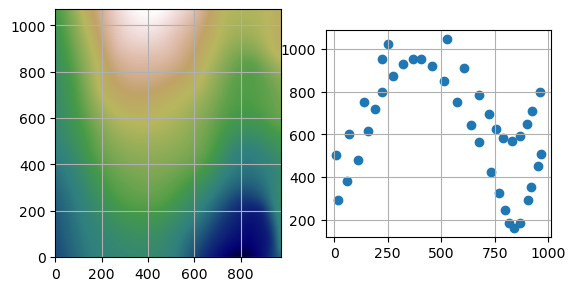

In [6]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

### Extracting the Coordinates

The ``X``, ``Y`` and ``Z`` coordinates of the GeoDataFrame can be extracted using the function ``extract_xyz(..)``.

The resulting GeoDataFrame has now an additional ``X``, ``Y`` and ``Z`` column containing the coordinates of the point objects. These can now be easily used for further processing. The geometry types of the shapely objects remained unchanged. The id column was dropped by default.

In [7]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,Ton,POINT (19.15013 293.31349),19.15,293.31,364.99
1,Ton,POINT (61.93437 381.45933),61.93,381.46,400.34
2,Ton,POINT (109.35786 480.94557),109.36,480.95,459.55
3,Ton,POINT (157.81230 615.99943),157.81,616.00,525.69
4,Ton,POINT (191.31803 719.09398),191.32,719.09,597.63


### Plotting the Result

The figures below show the elevation data (blue = 250 m, white = 750 m), the original point data and the point data including color-coded X, Y and Z values.


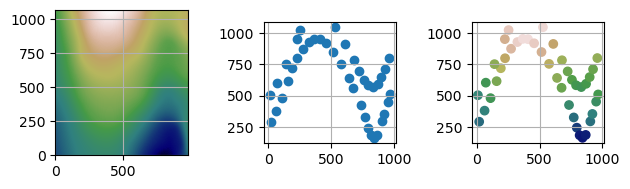

In [8]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

gdf_xyz.plot(ax=ax3, aspect='equal', column='Z', cmap='gist_earth',vmin=250, vmax=750)
ax3.grid()

plt.tight_layout()

## Line Data

The point data stored as shape file will be loaded as GeoDataFrame. The raster will be loaded using rasterio. 

In [9]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_lines.shp')

dem = rasterio.open(file_path + 'raster.tif')

In [10]:
gdf.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.25633 264.86215, 10.59347 276.73..."
1,None,Ton,"LINESTRING (0.18819 495.78721, 8.84067 504.141..."
2,None,Ton,"LINESTRING (970.67663 833.05262, 959.37243 800..."


In [11]:
dem.read()

array([[[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
         622.05786],
        [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
         622.06714],
        [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
         622.08923],
        ...,
        [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
         366.3984 ],
        [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
         363.96167],
        [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
         361.78635]]], dtype=float32)

### Plotting the Data

The figures below show the original raster and point data.

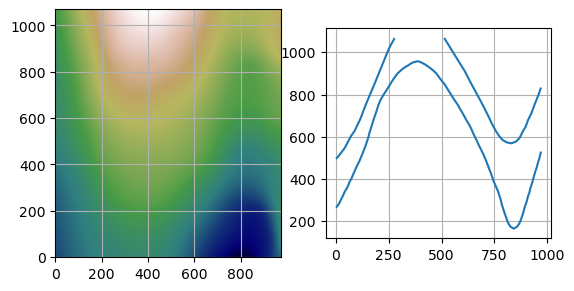

In [12]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

### Extracting the Coordinates

The ``X``, ``Y`` and ``Z`` coordinates of the GeoDataFrame can be extracted using the function ``extract_xyz(..)``.

The resulting GeoDataFrame has now an additional ``X``, ``Y`` and ``Z`` column. These represent the values of the extracted vertices. The geometry types of the shapely objects in the GeoDataFrame were converted from LineStrings to Points to match the X, Y and Y column data. The ``id`` column was dropped by default. The index of the new GeoDataFrame was reset.


In [13]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,Sand1,POINT (0.25633 264.86215),0.26,264.86,353.97
1,Sand1,POINT (10.59347 276.73371),10.59,276.73,359.04
2,Sand1,POINT (17.13494 289.08982),17.13,289.09,364.28
3,Sand1,POINT (19.15013 293.31349),19.15,293.31,364.99
4,Sand1,POINT (27.79512 310.57169),27.80,310.57,372.81


### Plotting the Result

The figures below show the elevation data (blue = 250 m, white = 750 m), the original LineString data and the extracted point data including color-coded X, Y and Z values.


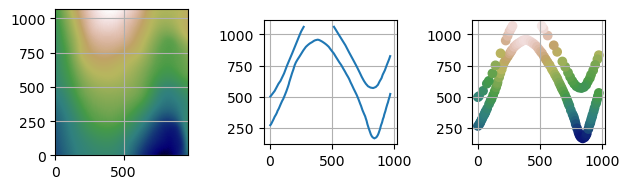

In [14]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

gdf_xyz.plot(ax=ax3, aspect='equal', column='Z', cmap='gist_earth',vmin=250, vmax=750)
ax3.grid()

plt.tight_layout()

## Polygon Data

The point data stored as shape file will be loaded as GeoDataFrame. The raster will be loaded using rasterio.

In [15]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_polygons.shp')

dem = rasterio.open(file_path + 'raster.tif')

In [16]:
gdf.head()

,id,formation,geometry
0,None,Sand1,"POLYGON ((0.25633 264.86215, 10.59347 276.7337..."
1,None,Ton,"POLYGON ((0.25633 264.86215, 0.18819 495.78721..."
2,None,Sand2,"POLYGON ((0.18819 495.78721, 0.24897 1068.7595..."
3,None,Sand2,"POLYGON ((511.67477 1068.85246, 971.69794 1068..."


In [17]:
dem.read()

array([[[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
         622.05786],
        [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
         622.06714],
        [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
         622.08923],
        ...,
        [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
         366.3984 ],
        [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
         363.96167],
        [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
         361.78635]]], dtype=float32)

### Plotting the Data

The figures below show the original raster and point data.

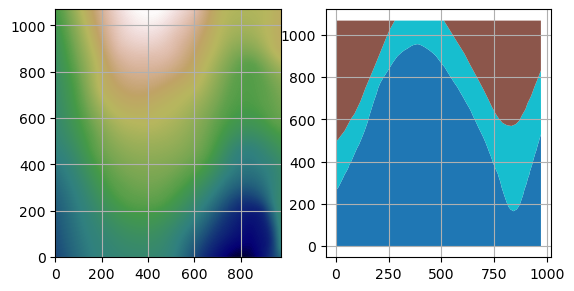

In [18]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal', column='formation')
ax2.grid()

### Extracting the Coordinates

The ``X``, ``Y`` and ``Z`` coordinates of the GeoDataFrame can be extracted using the function ``extract_xyz(..)``.

The resulting GeoDataFrame has now an additional ``X``, ``Y`` and ``Z`` column. These represent the values of the extracted vertices. The geometry types of the shapely objects in the GeoDataFrame were converted from LineStrings to Points to match the X, Y and Y column data. The ``id`` column was dropped by default. The index of the new GeoDataFrame was reset.


In [19]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem,
                                remove_total_bounds=True,
                                threshold_bounds=1)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,Sand1,POINT (10.59347 276.73371),10.59,276.73,359.04
1,Sand1,POINT (17.13494 289.08982),17.13,289.09,364.28
2,Sand1,POINT (19.15013 293.31349),19.15,293.31,364.99
3,Sand1,POINT (27.79512 310.57169),27.80,310.57,372.81
4,Sand1,POINT (34.41735 324.13919),34.42,324.14,377.43


### Plotting the Result

The figures below show the elevation data (blue = 250 m, white = 750 m), the original Polygon data and the extracted point data including color-coded X, Y and Z values.


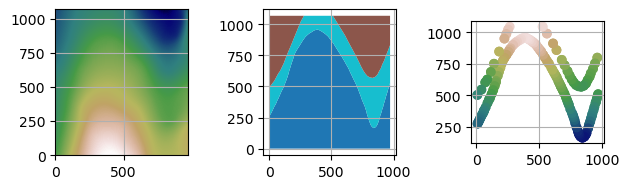

In [20]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(dem.read(1), origin='lower', cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal', column='formation')
ax2.grid()

gdf_xyz.plot(ax=ax3, aspect='equal', column='Z', cmap='gist_earth',vmin=250, vmax=750)
ax3.grid()

plt.tight_layout()

## Additional Arguments

Several additional arguments can be passed to adapt the functionality of the function. For further reference, see the [API Reference for extract_xyz](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).

* reset_index (bool)
* drop_id (bool)
* drop_level0 (bool)
* drop_level1 (bool)
* drop_index (bool)
* drop_points (bool)
* target_crs(str, pyproj.crs.crs.CRS)
* bbox (list)
* remove_total_bounds (bool)
* threshold_bounds (float, int)

### Original Function 
Original function with default arguments.

In [21]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem,
                                reset_index=True,
                                drop_id=True,
                                drop_level0=True,
                                drop_level1=True, 
                                drop_index=True, 
                                drop_points=True,
                                target_crs=gdf.crs,
                                bbox = None)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,Sand1,POINT (0.25633 264.86215),0.26,264.86,353.97
1,Sand1,POINT (10.59347 276.73371),10.59,276.73,359.04
2,Sand1,POINT (17.13494 289.08982),17.13,289.09,364.28
3,Sand1,POINT (19.15013 293.31349),19.15,293.31,364.99
4,Sand1,POINT (27.79512 310.57169),27.80,310.57,372.81


### Avoid resetting the index and do not drop ID column

This time, the index is not reset and the id column is not dropped.

In [22]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem,
                                reset_index=False,
                                drop_id=False,
                                drop_level0=True,
                                drop_level1=True, 
                                drop_index=False, 
                                drop_points=False,
                                target_crs=gdf.crs,
                                bbox = None)

gdf_xyz.head()

id formation                    geometry  \
0 0  None     Sand1   POINT (0.25633 264.86215)   
  0  None     Sand1  POINT (10.59347 276.73371)   
  0  None     Sand1  POINT (17.13494 289.08982)   
  0  None     Sand1  POINT (19.15013 293.31349)   
  0  None     Sand1  POINT (27.79512 310.57169)   

                                      points     X      Y      Z  
0 0  [0.256327195431048, 264.86214748436396]  0.26 264.86 353.97  
  0  [10.59346813871597, 276.73370778641777] 10.59 276.73 359.04  
  0   [17.134940141888464, 289.089821570188] 17.13 289.09 364.28  
  0   [19.150128045807676, 293.313485355882] 19.15 293.31 364.99  
  0    [27.79511673965105, 310.571692592952] 27.80 310.57 372.81

### Resetting the index and keeping index columns

The index is reset but the previous index columns ``level_0`` and ``level_1`` are kept.

In [23]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem,
                                reset_index=True,
                                drop_id=False,
                                drop_level0=False,
                                drop_level1=False, 
                                drop_index=False, 
                                drop_points=False,
                                target_crs=gdf.crs,
                                bbox = None)

gdf_xyz.head()

,level_0,level_1,id,formation,geometry,points,X,Y,Z
0,0,0,None,Sand1,POINT (0.25633 264.86215),"[0.256327195431048, 264.86214748436396]",0.26,264.86,353.97
1,0,0,None,Sand1,POINT (10.59347 276.73371),"[10.59346813871597, 276.73370778641777]",10.59,276.73,359.04
2,0,0,None,Sand1,POINT (17.13494 289.08982),"[17.134940141888464, 289.089821570188]",17.13,289.09,364.28
3,0,0,None,Sand1,POINT (19.15013 293.31349),"[19.150128045807676, 293.313485355882]",19.15,293.31,364.99
4,0,0,None,Sand1,POINT (27.79512 310.57169),"[27.79511673965105, 310.571692592952]",27.80,310.57,372.81


## Background Functions

The function `extract_xy` is a combination of the following functions and their subfunctions:

- `extract_xyz_rasterio`
- `extract_xyz_array`
- `extract_xy` and subsequent functions

For more information of these functions see the [API Reference](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).